In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv( "exoplanet_data.csv")
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
X = df.drop(columns=['koi_disposition'])
X.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [4]:
X = StandardScaler().fit_transform(X)
n_components = 20
pca = PCA(n_components=n_components) 
principalComponents = pca.fit_transform(X)
principalDataframe = pd.DataFrame(data = principalComponents,columns=[f'PC{i}' for i in range(1,n_components+1)])
principalDataframe.head()
 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-0.704747,-1.017367,0.309499,2.195659,0.374530,-0.302161,0.063549,0.285609,0.520460,0.208651,-0.014814,0.505998,-0.997899,-0.345460,0.446667,-0.199556,-0.373008,0.145869,0.193399,-0.010630
1,-1.088252,-0.663318,0.210327,-0.562924,0.234533,0.273301,1.328042,0.028100,0.005212,1.183331,-0.005051,0.392282,-1.102257,-0.515366,-0.567265,0.326242,0.133808,0.383243,0.070810,-0.229779
2,-1.346522,-0.516375,0.233866,-0.402728,0.394083,-0.026765,1.280108,-0.281120,0.493390,0.863904,-0.684923,-0.003985,-0.454617,1.331382,0.372577,0.522143,-0.177737,0.162609,-0.137373,0.100087
3,-0.827485,-0.373820,0.124532,-0.385313,-0.269652,0.190999,0.842810,1.178154,1.089330,0.848525,-0.751152,0.360421,-0.415920,0.882506,-0.096232,0.258938,0.118804,-0.099366,0.088495,0.082183
4,-0.595490,-0.473804,0.104401,-0.693366,-0.429392,0.366188,0.895980,1.398046,1.358360,0.961434,-0.174273,1.159832,-0.800090,-0.917032,0.424786,0.132609,-0.319293,0.165149,0.175326,0.089422


In [5]:
targetDataframe = df[['koi_disposition']]
newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)
newDataframe.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,koi_disposition
0,-0.704747,-1.017367,0.309499,2.195659,0.374530,-0.302161,0.063549,0.285609,0.520460,0.208651,...,0.505998,-0.997899,-0.345460,0.446667,-0.199556,-0.373008,0.145869,0.193399,-0.010630,CONFIRMED
1,-1.088252,-0.663318,0.210327,-0.562924,0.234533,0.273301,1.328042,0.028100,0.005212,1.183331,...,0.392282,-1.102257,-0.515366,-0.567265,0.326242,0.133808,0.383243,0.070810,-0.229779,FALSE POSITIVE
2,-1.346522,-0.516375,0.233866,-0.402728,0.394083,-0.026765,1.280108,-0.281120,0.493390,0.863904,...,-0.003985,-0.454617,1.331382,0.372577,0.522143,-0.177737,0.162609,-0.137373,0.100087,FALSE POSITIVE
3,-0.827485,-0.373820,0.124532,-0.385313,-0.269652,0.190999,0.842810,1.178154,1.089330,0.848525,...,0.360421,-0.415920,0.882506,-0.096232,0.258938,0.118804,-0.099366,0.088495,0.082183,CONFIRMED
4,-0.595490,-0.473804,0.104401,-0.693366,-0.429392,0.366188,0.895980,1.398046,1.358360,0.961434,...,1.159832,-0.800090,-0.917032,0.424786,0.132609,-0.319293,0.165149,0.175326,0.089422,CONFIRMED


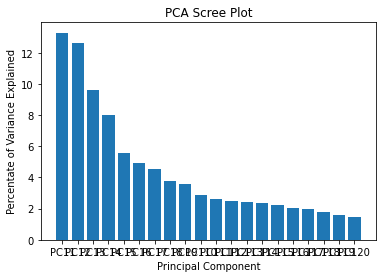

In [6]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = [f'PC1{i}' for i in range(1,n_components+1)]
plt.bar(x= range(1,n_components+1), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

Text(0, 0.5, 'PC2')

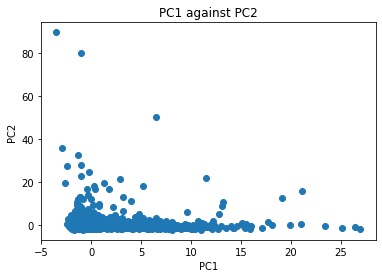

In [7]:
plt.scatter(principalDataframe.PC1, principalDataframe.PC2)
plt.title('PC1 against PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')

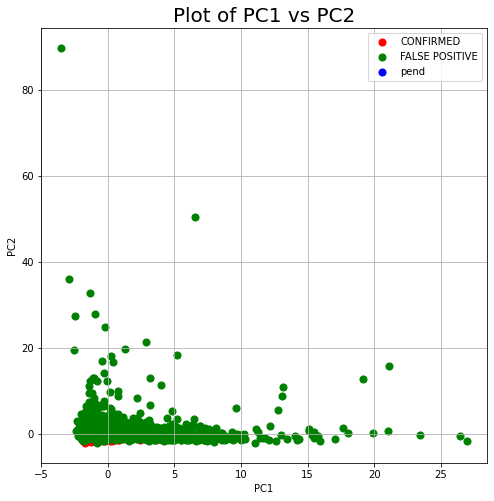

In [8]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.set_title('Plot of PC1 vs PC2', fontsize = 20)

targets = ['CONFIRMED', 'FALSE POSITIVE', 'pend']

colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = newDataframe['koi_disposition'] == target
    ax.scatter(newDataframe.loc[indicesToKeep, 'PC1']
               , newDataframe.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()

In [9]:
pca.explained_variance_ratio_.sum()

0.8983945937616618